In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
import sklearn.gaussian_process as gp
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
import catboost as cb
import lightgbm as lgb
import shap

# 解决中文乱码问题
plt.rcParams["font.sans-serif"]=["SimHei"] 
plt.rcParams["axes.unicode_minus"]=False 

In [2]:
def data_load():
    data=pd.read_csv('./try.csv')
    train_data,test_data=train_test_split(data,test_size=0.2, random_state=1318)
    feature=train_data.drop(['Ea'],axis=1)
    label=train_data['Ea']
    return feature,label,test_data

In [3]:
kfold = KFold(n_splits = 5, random_state = 1314, shuffle = True)
log_param1 = [1e-2, 1e-1, 1.0, 10, 1e2]
log_param2 = [1.0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
log_param3 = [1.0, 10, 1e2, 1e3, 1e4, 1e5]

In [4]:
model=['LightGBM','AdaBoost','Catboost','Lasso','Ridge','GPR','SVR','RFR','ETR','XGB']
r2=[]
mae=[]
feat, target ,test_data = data_load()

In [5]:
feat.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
# LightGBM
cvmodel = GridSearchCV(lgb.LGBMRegressor(random_state=1314,iterations=300,verbose=-1,lambda_l2=0.231,learning_rate=0.1),
                       param_grid={'max_depth':[1,10]},
                       n_jobs = -1)
print('LightGBM:')
r2.append(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='r2').mean())
mae.append(abs(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='neg_mean_absolute_error').mean()))
print('r2:',r2[-1])
print('mae:',mae[-1])
print('----------------')

LightGBM:
r2: 0.7039541945899467
mae: 0.1469538645302323
----------------


In [7]:

#AdaBoost
cvmodel = GridSearchCV(AdaBoostRegressor( random_state = 1314,learning_rate=2),
                        param_grid = {'n_estimators':[100,300,500, 1000]},
                        n_jobs = -1)
print('AdaBoost:')
r2.append(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='r2').mean())
mae.append(abs(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='neg_mean_absolute_error').mean()))
print('r2:',r2[-1])
print('mae:',mae[-1])
print('----------------')

AdaBoost:
r2: 0.6644607537243419
mae: 0.17111837278975867
----------------


In [8]:
# CatBoost
cvmodel = GridSearchCV(cb.CatBoostRegressor(random_state=1314,iterations=500,silent=True,learning_rate=0.1),
                       param_grid={'depth':[1,10]},
                       n_jobs = -1)
print('Catboost:')
r2.append(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='r2').mean())
mae.append(abs(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='neg_mean_absolute_error').mean()))
print('r2:',r2[-1])
print('mae:',mae[-1])
print('----------------')

Catboost:
r2: 0.7047554779125988
mae: 0.14449934013202945
----------------


In [9]:
#Lasso
cvmodel = GridSearchCV(Lasso(),
                        param_grid = {'alpha': log_param1},
                        n_jobs = -1)
print('Lasso:')
r2.append(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='r2').mean())
mae.append(abs(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='neg_mean_absolute_error').mean()))
print('r2:',r2[-1])
print('mae:',mae[-1])
print('----------------')

Lasso:
r2: 0.5951527430977903
mae: 0.19040986851206004
----------------


In [10]:

#Ridge
cvmodel = GridSearchCV(Ridge(),
                        param_grid = {'alpha': log_param1},
                        n_jobs = -1)
print('Ridge:')
r2.append(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='r2').mean())
mae.append(abs(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='neg_mean_absolute_error').mean()))
print('r2:',r2[-1])
print('mae:',mae[-1])
print('----------------')

Ridge:
r2: 0.6492840181811401
mae: 0.17198528527213505
----------------


In [11]:

#GPR
kernel = gp.kernels.Matern(nu = 2.5)
cvmodel = GridSearchCV(gp.GaussianProcessRegressor(kernel = kernel,
                                                    normalize_y = True,
                                                    n_restarts_optimizer = 10,
                                                    random_state = 1314),
                        param_grid = {'alpha':log_param2},
                        n_jobs = -1)
print('GPR:')
r2.append(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='r2').mean())
mae.append(abs(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='neg_mean_absolute_error').mean()))
print('r2:',r2[-1])
print('mae:',mae[-1])
print('----------------')

GPR:
r2: 0.6656907824770929
mae: 0.1579369688357955
----------------


In [12]:

#SVR
cvmodel = GridSearchCV(SVR(kernel = 'rbf'),
                        param_grid = {'C': log_param3,
                                        'gamma':log_param2,
                                        'epsilon':log_param1},
                        n_jobs = -1)
print('SVR(rbf):')
r2.append(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='r2').mean())
mae.append(abs(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='neg_mean_absolute_error').mean()))
print('r2:',r2[-1])
print('mae:',mae[-1])
print('----------------')

SVR(rbf):
r2: 0.6211531432461561
mae: 0.15835041532914623
----------------


In [13]:
#SVR
cvmodel = GridSearchCV(SVR(kernel = 'linear',C=10,epsilon=0.1),
                        param_grid = {
                                        'gamma':log_param2
                                        },
                        n_jobs = -1)
print('SVR(Linear):')
r2.append(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='r2').mean())
mae.append(abs(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='neg_mean_absolute_error').mean()))
print('r2:',r2[-1])
print('mae:',mae[-1])
print('----------------')

SVR(Linear):
r2: 0.6136698978221602
mae: 0.17969106710115146
----------------


In [14]:

#RFR
cvmodel = GridSearchCV(RandomForestRegressor(n_jobs = -1, random_state = 1314),
                        param_grid = {'n_estimators':[500, 1000]},
                        n_jobs = -1)
print('RFR:')
r2.append(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='r2').mean())
mae.append(abs(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='neg_mean_absolute_error').mean()))
print('r2:',r2[-1])
print('mae:',mae[-1])
print('----------------')

RFR:
r2: 0.6906119586544757
mae: 0.1468867136054421
----------------


In [15]:

#ETR
cvmodel = GridSearchCV(ExtraTreesRegressor(n_jobs = -1, random_state = 1314),
                        param_grid = {'n_estimators':[500, 1000]},
                        n_jobs = -1)
print('ETR:')
r2.append(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='r2').mean())
mae.append(abs(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='neg_mean_absolute_error').mean()))
print('r2:',r2[-1])
print('mae:',mae[-1])
print('----------------')

ETR:
r2: 0.6714407516234525
mae: 0.14176797619047704
----------------


In [16]:

#XGB
# cvmodel = GridSearchCV(XGBRegressor(n_jobs = -1, random_state = 1314,learning_rate=0.1),
#                         param_grid = {'n_estimators':[300, 500],'max_depth':[2,3,4,5,6,7,8,9,10]},
#                         n_jobs = -1)
# print('XGB:')
# r2.append(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='r2').mean())
# mae.append(abs(cross_val_score(estimator=cvmodel,X=feat, y=target, cv=kfold, scoring='neg_mean_absolute_error').mean()))
# print('r2:',r2[-1])
# print('mae:',mae[-1])
# print('----------------')

In [17]:
model=['LGBM','Ada','Cat','Lasso','Ridge','GPR','SVR(rbf)','SVR(Linear)','RFR','ETR']
c={'model' : model,
   'R2' : r2,
   'MAE' : mae
   }
final=pd.DataFrame(c)
final

,model,R2,MAE
0,LGBM,0.703954,0.146954
1,Ada,0.664461,0.171118
2,Cat,0.704755,0.144499
3,Lasso,0.595153,0.190410
4,Ridge,0.649284,0.171985
5,GPR,0.665691,0.157937
6,SVR(rbf),0.621153,0.158350
7,SVR(Linear),0.613670,0.179691
8,RFR,0.690612,0.146887
9,ETR,0.671441,0.141768


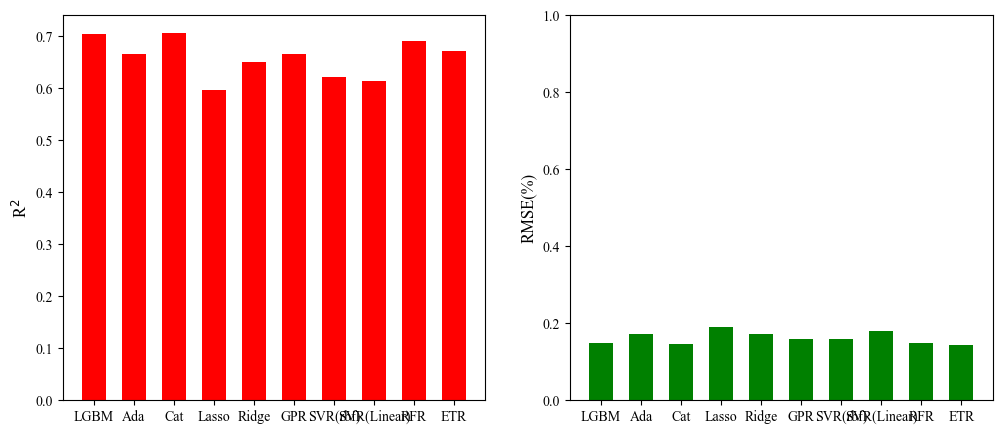

In [18]:
from pathlib import Path
fig,axs=plt.subplots(1,2,figsize=(12,5))
# fig.suptitle('硼基催化剂中中各个模型拟合效果评估',y=0)

axs[0].bar(final.iloc[:,0],final.iloc[:,1],width=0.6,fc='r')
axs[0].set_ylabel('R$^2$',font=Path('..\TimesNewRoman.ttf'),fontsize=12)
x1_label = axs[0].get_xticklabels() 
[x1_label_temp.set_fontname('Times New Roman') for x1_label_temp in x1_label]
y1_label = axs[0].get_yticklabels() 
[y1_label_temp.set_fontname('Times New Roman') for y1_label_temp in y1_label]
axs[1].bar(final.iloc[:,0],final.iloc[:,2],width=0.6,fc='g')
axs[1].set_ylabel('RMSE(%)',font=Path('..\TimesNewRoman.ttf'),fontsize=12)
x2_label = axs[1].get_xticklabels() 
[x2_label_temp.set_fontname('Times New Roman') for x2_label_temp in x2_label]
y2_label = axs[1].get_yticklabels() 
[y2_label_temp.set_fontname('Times New Roman') for y2_label_temp in y2_label]
axs[1].set_ylim(0,1)
plt.show()